In [1]:
import pandas as pd
import numpy as np
import scGeneRAI
import os
import networkx as nx

In [4]:
# ex_data = pd.read_csv('../scGeneRAI/data/example_data.csv').iloc[:,3:]
# ex_data_descriptors = pd.read_csv('../scGeneRAI/data/example_data.csv').iloc[:,1:3]

In [34]:
raw = pd.read_csv('../scGeneRAI/data/raw_data.csv')
filtered_raw = raw[raw['Cell.Type'].str.count(',') == 0]
ex_data = filtered_raw.iloc[:,13:]
ex_data_descriptors = filtered_raw.iloc[:,[2,12]]

In [35]:
means = ex_data.mean(axis=0)
sds = ex_data.std(axis=0)

ex_data = (ex_data-means)/sds

In [36]:
ex_data

AT1G01070  AT1G01120  AT1G01370  AT1G01390  AT1G01480  AT1G01610  \
0      -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
2      -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
3      -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
5      -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
6      -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
...          ...        ...        ...        ...        ...        ...   
16662  12.251312  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
16663  -0.054235  -0.038881   -0.09208  -0.029137   1.199100  -0.020996   
16664  -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
16667  -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   
16668  -0.054235  -0.038881   -0.09208  -0.029137  -0.244746  -0.020996   

       AT1G01620  AT1G01680  AT1G02310  AT1G02360  ...  AT5G66040  AT5G66052  \
0      -0.415231  -0.201809  -0.145814  -0.131929  ...  -0.347265  -0.014091   
2       0.379894  -0.201809  -0.145814  -0.131929  ...  -0.177035  -0.571049   
3       0.174082  -0.201809  -0.145814  -0.131929  ...   1.242440   0.233290   
5       0.077218  -0.201809  -0.145814  -0.131929  ...  -0.252379   0.661192   
6       0.058703  -0.201809  -0.145814  -0.131929  ...  -0.347265   0.291433   
...          ...        ...        ...        ...  ...        ...        ...   
16662  -0.415231  -0.201809  -0.145814  -0.131929  ...   1.466200   5.851829   
16663  -0.415231   0.637920  -0.145814  -0.131929  ...  -0.347265   0.068118   
16664  -0.415231  -0.201809  -0.145814  -0.131929  ...  -0.347265  -0.571049   
16667  -0.415231  -0.201809  -0.145814  -0.131929  ...  -0.347265  -0.571049   
16668  -0.415231  -0.201809  -0.145814  -0.131929  ...   0.575494  -0.571049   

       AT5G66400  AT5G66440  AT5G66580  AT5G67080  AT5G67180  AT5G67270  \
0      -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
2      -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
3      -0.098676  -0.096011  -0.106749  -0.015719  -0.145216   -0.03177   
5      -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
6      -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
...          ...        ...        ...        ...        ...        ...   
16662  -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
16663  -0.098676  -0.096011  -0.106749   0.055306  -0.145216   -0.03177   
16664  -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
16667  -0.098676  -0.096011  -0.106749  -0.385694  -0.145216   -0.03177   
16668  -0.098676  -0.096011  -0.106749   1.117597  -0.145216   -0.03177   

       AT5G67480  AT5G67600  
0      -0.462078  -0.297512  
2      -0.020737  -0.297512  
3      -0.020489   0.443478  
5      -0.277575  -0.297512  
6      -0.462078  -0.297512  
...          ...        ...  
16662   0.713327   3.252699  
16663  -0.286624   0.055784  
16664  -0.462078  -0.297512  
16667  -0.462078   3.521110  
16668   0.136012  -0.297512  

[11749 rows x 2000 columns]

In [37]:
ex_data_descriptors

orig.ident  Cell.Type
0        Control  Mesophyll
2        Control  Mesophyll
3        Control     Phloem
5        Control  Mesophyll
6        Control  Mesophyll
...          ...        ...
16662     DC3000      Xylem
16663     DC3000    Unknown
16664     DC3000  Epidermis
16667     DC3000  Epidermis
16668     DC3000  Columella

[11749 rows x 2 columns]

In [38]:
model = scGeneRAI.scGeneRAI()

In [ ]:
model.fit(ex_data, nepochs = 100, model_depth =2, descriptors = ex_data_descriptors, early_stopping=True, device_name = 'cpu')


  3%|▎         | 3/100 [08:32<4:36:02, 170.75s/it]

In [26]:
model.predict_networks(ex_data.iloc[:50,:], descriptors = ex_data_descriptors.iloc[:50,:], PATH = '.')

In [27]:
ex_data_descriptors.shape

(18114, 2)

In [28]:
files = os.listdir('./results')

In [29]:
network_data = pd.concat([pd.read_csv('./results/' + file) for file in files])

In [34]:
network_data['LRP'] = np.abs(network_data['LRP'])
network_data = network_data[network_data['source_gene'] != network_data['target_gene']]

average_network = network_data[['LRP', 'source_gene', 'target_gene']].groupby(['source_gene', 'target_gene']).mean().reset_index()

In [35]:
edges = average_network.sort_values(by='LRP', ascending=False).iloc[:20,:]
edges

source_gene target_gene       LRP
65       RPS27       RPL10  0.158611
37         JUN         FOS  0.121053
2         FOSB         FOS  0.119806
45       RPL10      EEF1A1  0.110893
38         JUN        FOSB  0.109121
55       RPS27      EEF1A1  0.060431
9        HSPA5     HSP90B1  0.050556
49       RPL10       HSPA5  0.035375
57       RPS27        FOSB  0.033500
47       RPL10        FOSB  0.031428
41         JUN         ID1  0.030777
42         JUN         ID2  0.030318
20         ID2         ID1  0.029066
43         JUN         ID3  0.028678
6        HSPA5      EEF1A1  0.027761
26         ID3         ID1  0.027578
46       RPL10         FOS  0.027051
40         JUN       HSPA5  0.026301
64       RPS27         JUN  0.024504
54       RPL10         JUN  0.024053

In [36]:
network = nx.from_pandas_edgelist(edges, source='source_gene', target='target_gene', edge_attr='LRP')

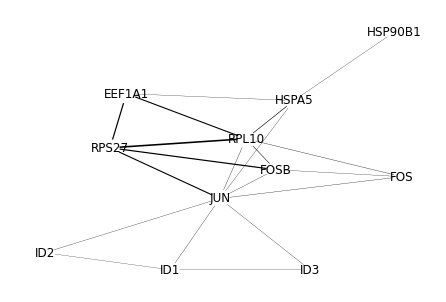

In [37]:
nx.draw(network, with_labels=True, node_color='white', width = edges['LRP']*10)